In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

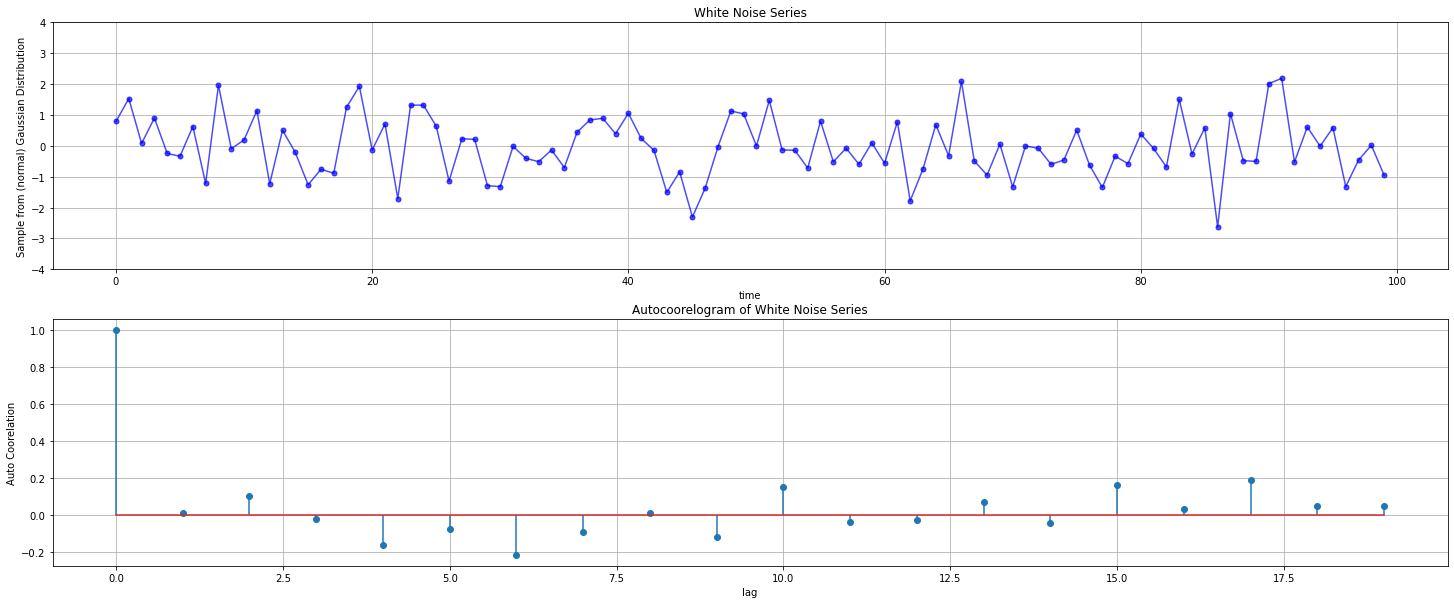

In [2]:
#White Noise Series: plot samples from a (normal) Gaussian Distribution

fig, axes = plt.subplots(2, 1, figsize = (25, 10))
total_samples = 100
time = range(0, total_samples)

mu, sigma = 0, 1


random_samples = np.random.normal(loc=mu, scale=sigma, size=total_samples)


axes[0].plot(time, random_samples, marker = '.', color  = 'blue', alpha=0.7, markersize = 10)
axes[0].set_ylim(-4, 4)
axes[0].set_title('White Noise Series')
axes[0].set_xlabel('time')
axes[0].set_ylabel('Sample from (normal) Gaussian Distribution')
axes[0].grid(True)
#compute autocoorelation

random_samples_dataframe = pd.Series(random_samples)
lag = 20
autocorr = [random_samples_dataframe.autocorr(lag=i) for i in range(0, lag)] 
axes[1].stem(range(0, len(autocorr)), autocorr)
axes[1].set_title('Autocoorelogram of White Noise Series')
axes[1].set_xlabel('lag')
axes[1].set_ylabel('Auto Coorelation')
axes[1].grid(True)

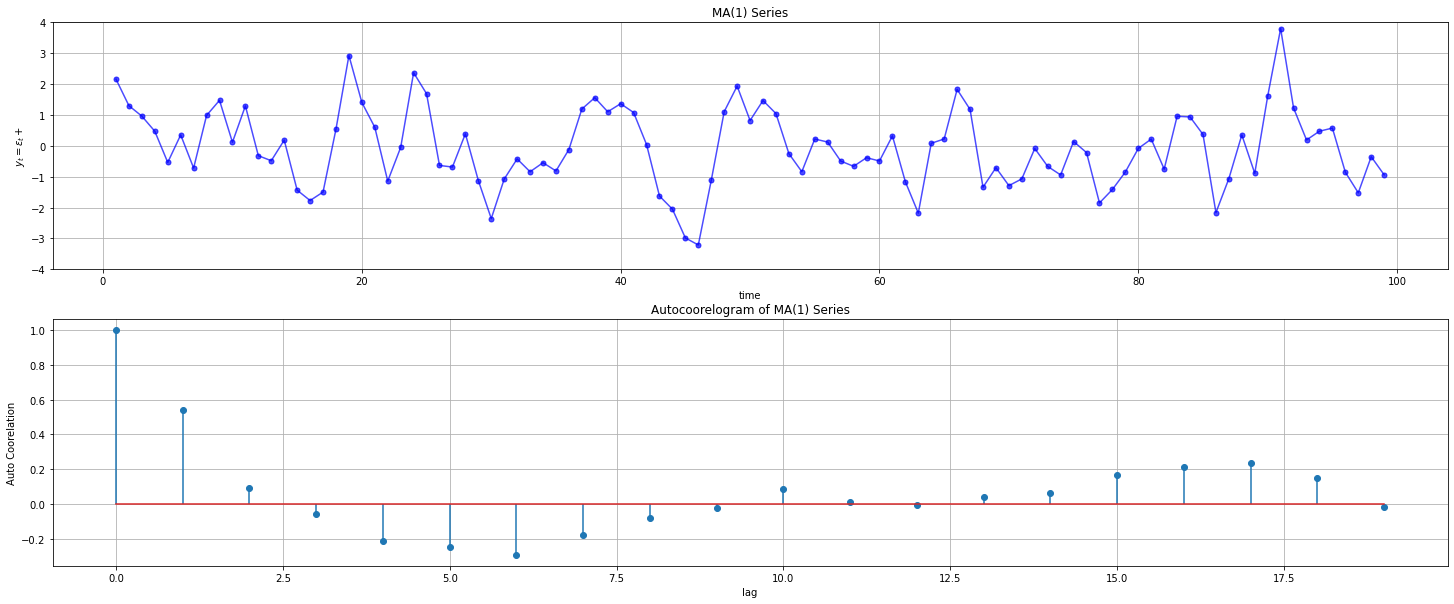

In [3]:
#Construct a MA(1) series - moving average series of order 1 (of the white noise realizations)


fig, axes = plt.subplots(2, 1, figsize = (25, 10))

order = 1
beta = 0.8 


MA_series = []

for i in range(1, len(random_samples)): 
    MA_series.append(random_samples[i] + beta*random_samples[i-1])
    
    
    
axes[0].plot(range(1, len(random_samples)), MA_series, marker = '.', color  = 'blue', alpha=0.7, markersize = 10)
axes[0].set_ylim(-4, 4)
axes[0].set_title('MA({}) Series'.format(order))
axes[0].set_xlabel('time')
axes[0].set_ylabel("$y_t = \epsilon_{t} + \beta \epsilon_{t-1}$")
axes[0].grid(True)



#compute autocoorelation

MA_dataframe = pd.Series(MA_series)
lag = 20
autocorr = [MA_dataframe.autocorr(lag=i) for i in range(0, lag)] 
axes[1].stem(range(0, len(autocorr)), autocorr)
axes[1].set_title('Autocoorelogram of MA({}) Series'.format(order))
axes[1].set_xlabel('lag')
axes[1].set_ylabel('Auto Coorelation')
axes[1].grid(True)

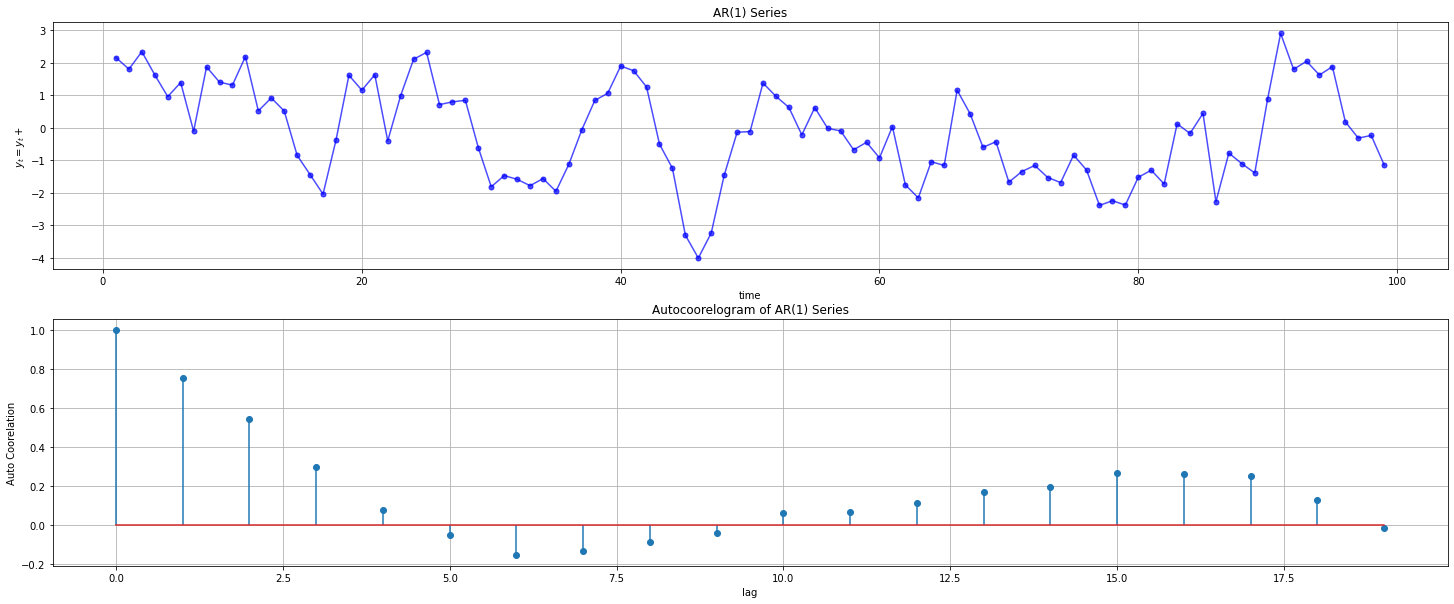

In [4]:
#Construct an AR(1) series - auto regressive series of order 1 (of the white noise realizations)


fig, axes = plt.subplots(2, 1, figsize = (25, 10))

order = 1
alpha = 0.8


AR_series = []
prev = random_samples[0]

for i in range(1, len(random_samples)): 
    y_i = random_samples[i] + alpha*prev
    AR_series.append(y_i)
    prev = y_i
    
    
axes[0].plot(range(1, len(random_samples)), AR_series, marker = '.', color  = 'blue', alpha=0.7, markersize = 10)
#axes[0].set_ylim(-4, 4)
axes[0].set_title('AR({}) Series'.format(order))
axes[0].set_xlabel('time')
axes[0].set_ylabel("$y_t = y_{t} + \alpha y_{t-1}$")
axes[0].grid(True)



#compute autocoorelation

AR_dataframe = pd.Series(AR_series)
lag = 20
autocorr = [AR_dataframe.autocorr(lag=i) for i in range(0, lag)] 
axes[1].stem(range(0, len(autocorr)), autocorr)
axes[1].set_title('Autocoorelogram of AR({}) Series'.format(order))
axes[1].set_xlabel('lag')
axes[1].set_ylabel('Auto Coorelation')
axes[1].grid(True) 




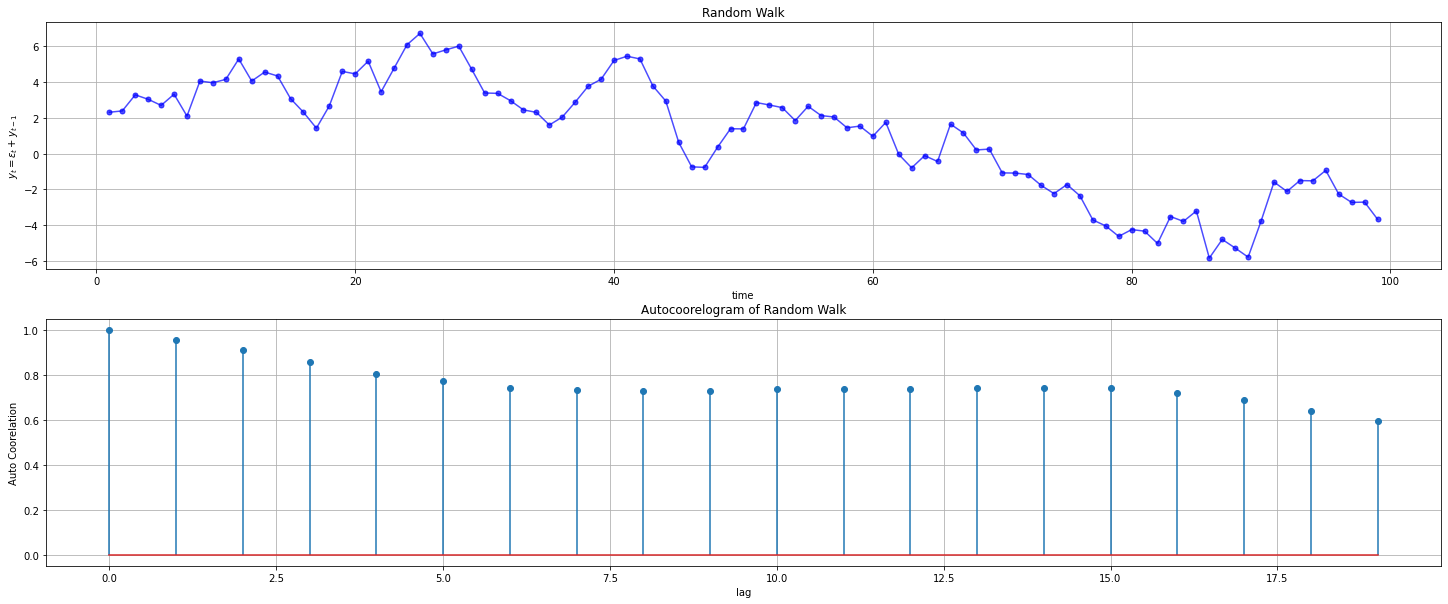

In [5]:
#Construct a Random Walk - essentially, just AR(1) with alpha = 1


fig, axes = plt.subplots(2, 1, figsize = (25, 10))

order = 1
alpha = 1


rw_series = []
prev = random_samples[0]

for i in range(1, len(random_samples)): 
    y_i = random_samples[i] + alpha*prev
    rw_series.append(y_i)
    prev = y_i
    
    
axes[0].plot(range(1, len(random_samples)), rw_series, marker = '.', color  = 'blue', alpha=0.7, markersize = 10)
#axes[0].set_ylim(-4, 4)
axes[0].set_title('Random Walk'.format(order))
axes[0].set_xlabel('time')
axes[0].set_ylabel("$y_t = \epsilon_{t} +  y_{t-1}$")
axes[0].grid(True)



#compute autocoorelation

rw_dataframe = pd.Series(rw_series)
lag = 20
autocorr = [rw_dataframe.autocorr(lag=i) for i in range(0, lag)] 
axes[1].stem(range(0, len(autocorr)), autocorr)
axes[1].set_title('Autocoorelogram of Random Walk'.format(order))
axes[1].set_xlabel('lag')
axes[1].set_ylabel('Auto Coorelation')
axes[1].grid(True) 


